## preprocessed_handler.ipynb

Notebook used to try and open NIfTI volumes preprocessed by nnUNet. Somewhat useless, given most of the information obtained can be read in the `.json` plans.

Author: Kieran Le Mouël

Date: 12/06/2025

In [2]:
import numpy as np
import nibabel as nib
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
path_NAS = "/home/klemouel/NAS_EMPENN/share/users/klemouel/Stage/"
path_CSV = path_NAS + "Correspondancies_ElectrodeDetection_Dataset.csv"
path_preprocessed = path_NAS + "nnUNet/nnUNet_preprocessed/Dataset005_Petra_65/nnUNetPlans_3d_fullres/"

prefix = "Hemisfer_"
suffix = ".pkl"

In [4]:
def open_preprocessed(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data

In [5]:
corr = pd.read_csv(path_CSV)

training_examples = []
classes_data = []

for index, row in corr.iterrows():
    if row['Set'] == "train":
        id = str(row['Id'])
        id = id.rjust(3,'0')

        source_path = path_preprocessed + prefix + id + suffix

        data = open_preprocessed(source_path)
        training_examples.append(data)
        classes_data.append(data['class_locations'])


FileNotFoundError: [Errno 2] No such file or directory: '/home/klemouel/NAS_EMPENN/share/users/klemouel/Stage/Correspondancies_ElectrodeDetection_Dataset.csv'

In [ ]:
def pretty_print_dict(input):
    print("~======~ Training Example ~======~")
    c = 1
    for element in input:
        print("-============================- Element " + str(c) + " -============================-")
        # print(type(element))
        for keys in element:
            print("-==- Current key : " + str(keys) + " -==-")
            for s_keys in element[keys]:
                if keys != 'class_locations':
                    print("-=- Key : " + str(s_keys) + " -=-")
                # print("- Associated Value : " + str(element[keys][s_keys]))
        c += 1 

In [ ]:
print(training_examples[0])

NameError: name 'training_examples' is not defined

(123, 4)
(123, 4)


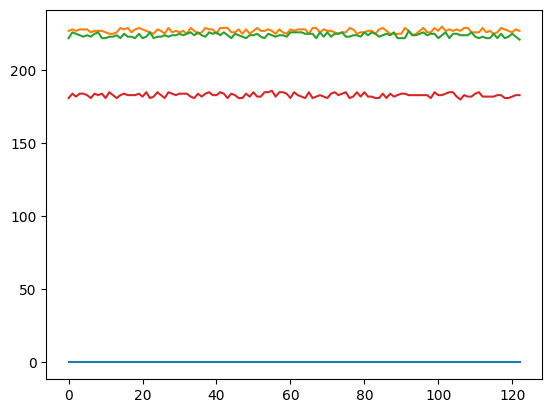

In [ ]:
# print(classes_data[0][np.int64(1)])

print(classes_data[0][1].shape)
print(classes_data[0][2].shape)

plt.plot(classes_data[1][1])
plt.show()

The call of `print(classes_data[0][1].shape)` gives out (123, 4), with 123 being equal to 7995/65. 

This is then probably the locations of electrodes with first label throughout the preprocessed volumes.